In [78]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt

In [79]:
def buggy_pca(data, d):
    #Singular Value Decomposition (SVD) of the input data
    U, S, VT = svd(data, full_matrices=False)

    #Projection to lower-dimensional space
    Z = np.dot(data, VT[:d].T)

    # Reconstruction in the original space using the first d singular vectors
    reconstruction = np.dot(Z, VT[:d])

    #Calculation of the reconstruction error (mean squared error)
    reconstruction_error = np.mean((data - reconstruction)**2)

    # Return the results
    return Z, VT, reconstruction, reconstruction_error


In [80]:
def demeaned_pca(data, d):
    #Calculate the mean along each column of the input data
    mean = np.mean(data, axis=0)

    #Subtract the mean from each column to demean the data
    demeaned_data = data - mean

    #Perform PCA on the demeaned data using the buggy_pca function
    Z, VT, reconstruction, _ = buggy_pca(demeaned_data, d)

    #Add the mean back to the reconstructed data to obtain the final reconstruction
    reconstruction += mean

    #Calculate the reconstruction error (mean squared error) between the original and reconstructed data
    reconstruction_error = np.mean((data - reconstruction)**2)

    # Return the results
    return Z, (VT, mean), reconstruction, reconstruction_error

In [81]:
def normalized_pca(data, d):
    #Calculate the mean and standard deviation along each column of the input data
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    #Normalize the data by subtracting the mean and dividing by the standard deviation
    normalized_data = (data - mean) / std

    #Perform PCA on the normalized data using the buggy_pca function
    Z, VT, reconstruction, _ = buggy_pca(normalized_data, d)

    #Scale the reconstructed data back to the original scale by multiplying by the standard deviation
    # and adding the mean
    reconstruction = reconstruction * std + mean

    #Calculate the reconstruction error (mean squared error) between the original and reconstructed data
    reconstruction_error = np.mean((data - reconstruction)**2)

    # Return the results
    return Z, (VT, mean, std), reconstruction, reconstruction_error


In [82]:
def dro(data, d):
    #Calculate the mean along each column of the input data
    b = np.mean(data, axis=0)

    #Subtract the mean from the data to demean it
    demeaned_data = data - b

    #Perform SVD on the demeaned data
    U, S, VT = svd(demeaned_data, full_matrices=False)

    #Calculate the number of samples (rows) in the data
    n = len(data)

    #Calculate the lower-dimensional representation
    Z = np.sqrt(n) * U[:, :d]

    #Construct the matrix A using the top d singular values and vectors
    A = np.dot((np.sqrt(1/n) * np.diag(S[:d])), VT[:d]).T

    #Reconstruct the data using the lower-dimensional representation and matrix A
    reconstruction = np.dot(Z, A.T) + b

    #Calculate the reconstruction error (mean squared error) between the original and reconstructed data
    reconstruction_error = np.mean((data - reconstruction)**2)

    # Return the results
    return Z, (A, b), reconstruction, reconstruction_error

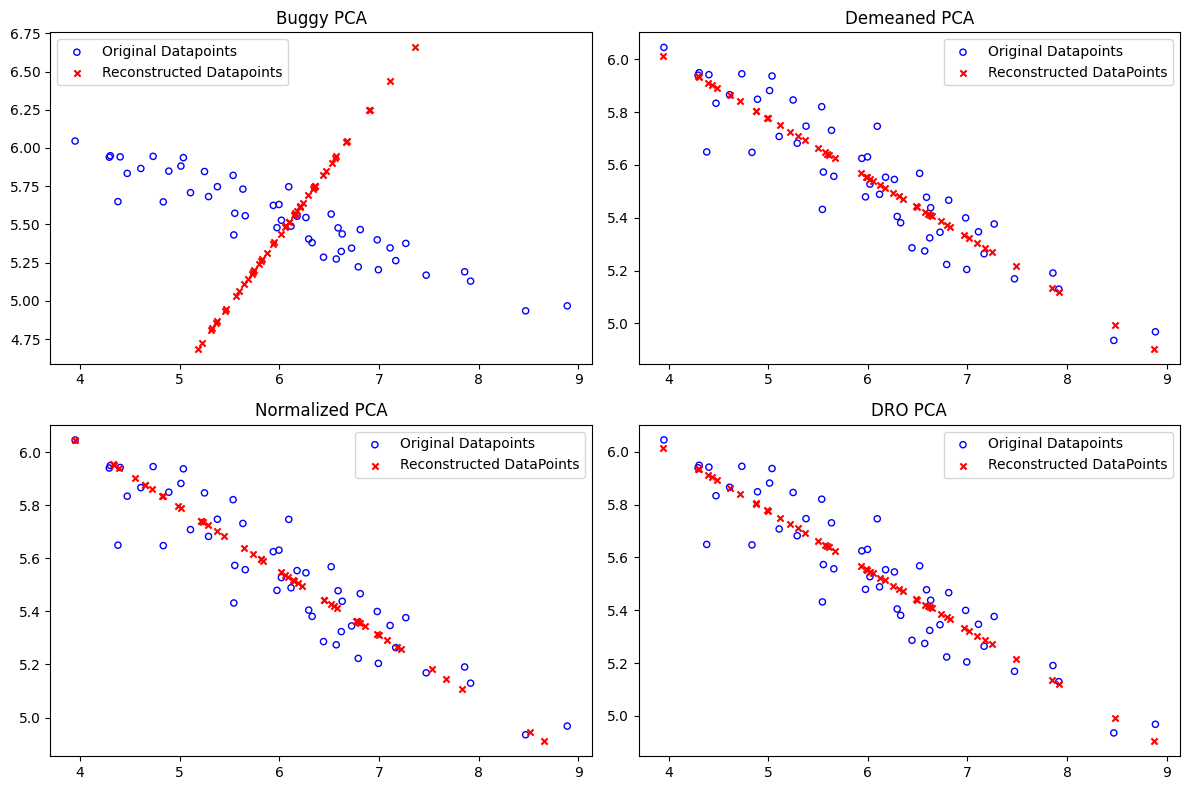

For 2D data : 
Buggy PCA Reconstruction Error: 0.4434515418673971
Demeaned PCA Reconstruction Error: 0.00500304281425646
Normalized PCA Reconstruction Error: 0.02473604172738534
DRO PCA Reconstruction Error: 0.00500304281425646


In [83]:
# FOR 2D
data_2d = np.loadtxt('data2D.csv', delimiter=',', skiprows=0)
d = 1

# Buggy PCA
z_buggy, params_buggy, reconstruction_buggy, error_buggy = buggy_pca(data_2d, d)

# Demeaned PCA
z_demeaned, params_demeaned, reconstruction_demeaned, error_demeaned = demeaned_pca(data_2d, d)

# Normalized PCA
z_normalized, params_normalized, reconstruction_normalized, error_normalized = normalized_pca(data_2d, d)

# DRO PCA
z_dro, params_dro, reconstruction_dro, error_dro = dro(data_2d, d)

# Plotting original vs reconstructed points
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1],marker='o',facecolors='none', edgecolors='b',s=20,label="Original Datapoints")
plt.scatter(reconstruction_buggy[:, 0], reconstruction_buggy[:, 1], marker='x',c='red',s=20,label="Reconstructed Datapoints")
plt.title('Buggy PCA')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data_2d[:, 0], data_2d[:, 1], marker='o',facecolors='none', edgecolors='b',s=20,label="Original Datapoints")
plt.scatter(reconstruction_demeaned[:, 0], reconstruction_demeaned[:, 1], label='Reconstructed DataPoints',s=20, c='red', marker='x')
plt.title('Demeaned PCA')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(data_2d[:, 0], data_2d[:, 1], marker='o',facecolors='none', edgecolors='b',s=20,label="Original Datapoints")
plt.scatter(reconstruction_normalized[:, 0], reconstruction_normalized[:, 1], label='Reconstructed DataPoints',s=20, c='red', marker='x')
plt.title('Normalized PCA')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(data_2d[:, 0], data_2d[:, 1], marker='o',facecolors='none', edgecolors='b',s=20,label="Original Datapoints")
plt.scatter(reconstruction_dro[:, 0], reconstruction_dro[:, 1], label='Reconstructed DataPoints', c='red', marker='x',s=20)
plt.title('DRO PCA')
plt.legend()

plt.tight_layout()
plt.show()

# Report reconstruction errors
print("For 2D data : ")
print(f'Buggy PCA Reconstruction Error: {error_buggy}')
print(f'Demeaned PCA Reconstruction Error: {error_demeaned}')
print(f'Normalized PCA Reconstruction Error: {error_normalized}')
print(f'DRO PCA Reconstruction Error: {error_dro}')



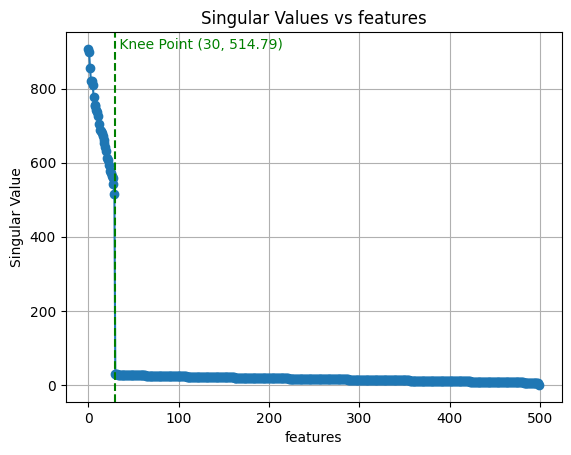

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_000D = np.loadtxt('./data1000D.csv', delimiter=',')
u, s, vh = svd((data_1000d-np.mean(data_1000d,axis=0)),full_matrices=False)

# Plot the singular values
plt.plot(s, marker='o')
plt.xlabel('features')
plt.ylabel('Singular Value')
plt.title('Singular Values vs features')
plt.grid(True)

# Find the knee point
knee_point = np.argmin(np.diff(s)) + 1

# Plot the knee point
plt.axvline(x=knee_point, color='green', linestyle='--')
plt.text(knee_point, max(s), f' Knee Point ({knee_point}, {s[knee_point-1]:.2f})', color='green')

# Show the plot
plt.show()


In [85]:
# Buggy PCA
#from above we can see the best d is 30.
d = 30
z_buggy, params_buggy, reconstruction_buggy, error_buggy = buggy_pca(data_1000d, d)

# Demeaned PCA
z_demeaned, params_demeaned, reconstruction_demeaned, error_demeaned = demeaned_pca(data_1000d, d)

# Normalized PCA
z_normalized, params_normalized, reconstruction_normalized, error_normalized = normalized_pca(data_1000d, d)

# DRO PCA
z_dro, params_dro, reconstruction_dro, error_dro = dro(data_1000d, d)

In [86]:
# Report reconstruction errors
print("For 1000D data : ")
print(f'Buggy PCA Reconstruction Error: {error_buggy}')
print(f'Demeaned PCA Reconstruction Error: {error_demeaned}')
print(f'Normalized PCA Reconstruction Error: {error_normalized}')
print(f'DRO PCA Reconstruction Error: {error_dro}')

For 1000D data : 
Buggy PCA Reconstruction Error: 0.8027313986203587
Demeaned PCA Reconstruction Error: 0.2730459589786028
Normalized PCA Reconstruction Error: 0.2736285809976232
DRO PCA Reconstruction Error: 0.2730459589786028
